In [1]:
from scipy.stats import multivariate_normal
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np

In [2]:
iris_df = sns.load_dataset('iris')
iris_df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
18,5.7,3.8,1.7,0.3,setosa
41,4.5,2.3,1.3,0.3,setosa
73,6.1,2.8,4.7,1.2,versicolor


Using the iris data, we're going to predict petal length based on sepal width and sepal length.

What would you guess the petal length would be for this test point? ->  an iris with sepal length 4.9 and sepal width 3.2!

Make a scatterplot which shows the whole dataset and the locations of the points to guess.

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

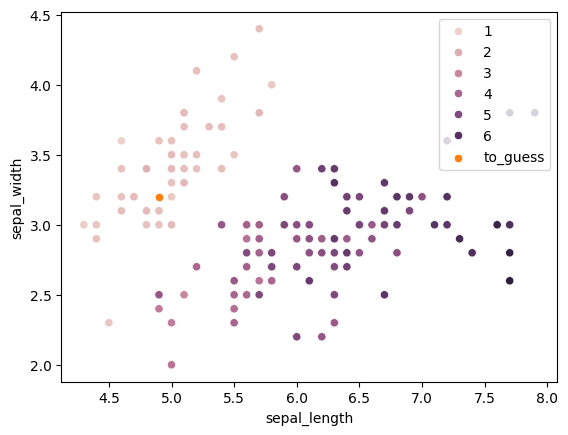

In [3]:
sns.scatterplot(
    data=iris_df,
    x = 'sepal_length',
    y='sepal_width',
    hue='petal_length',
)
to_guess_x_coords = [4.9]
to_guess_y_coords = [3.2]
sns.scatterplot(
    x=to_guess_x_coords,
    y=to_guess_y_coords,
    label='to_guess'
)

For each of the test points, find the closest 5 points in the data set by Euclidean distance.
Produce a scatterplot showing these neighbours
What is the average of their petal lengths?

In [5]:
test_point = (4.9, 3.2)

iris_df['euclidean_distance_from_test_point'] = np.sqrt(
    (iris_df['sepal_length'] - test_point[0])**2 + (iris_df['sepal_width'] - test_point[1])**2
)
iris_df['euclidean_distance_from_test_point']

,euclidean_distance_from_test_point
0,0.360555
1,0.200000
2,0.200000
3,0.316228
4,0.412311
...,...
145,1.811077
146,1.565248
147,1.612452
148,1.315295


In [8]:
index_of_closest_5_points = iris_df['euclidean_distance_from_test_point'].sort_values().head(5).index
index_of_closest_5_points

Index([35, 34, 9, 49, 30], dtype='int64')

In [10]:
neighbours = iris_df.loc[index_of_closest_5_points]
neighbours

,sepal_length,sepal_width,petal_length,petal_width,species,euclidean_distance_from_test_point
35,5.0,3.2,1.2,0.2,setosa,0.100000
34,4.9,3.1,1.5,0.2,setosa,0.100000
9,4.9,3.1,1.5,0.1,setosa,0.100000
49,5.0,3.3,1.4,0.2,setosa,0.141421
30,4.8,3.1,1.6,0.2,setosa,0.141421


In [12]:
neighbours['petal_length'].mean()

1.44

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

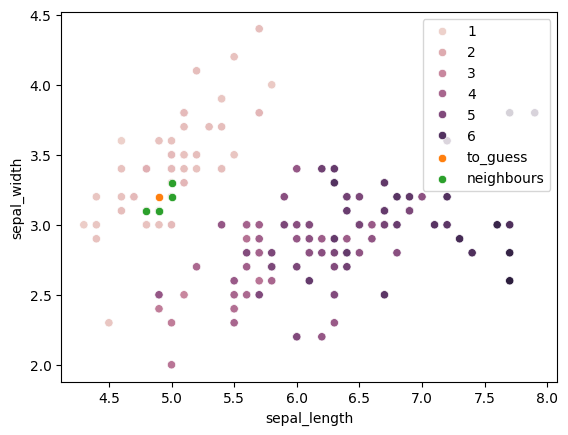

In [13]:
sns.scatterplot(
    data=iris_df,
    x = 'sepal_length',
    y='sepal_width',
    hue='petal_length',
)
sns.scatterplot(x=[4.9], y=[3.2], label='to_guess')
sns.scatterplot(
    data=neighbours,
    x = 'sepal_length',
    y='sepal_width',
    label='neighbours',
)

Fit a scikit learn K-Nearest Neighbours regressor to the data.
Make predictions for each point. Are the results the same to the ones you find above?
Why might they be different? How can you make them the same?

In [14]:
from sklearn.neighbors import KNeighborsRegressor

In [19]:
test_data = pd.DataFrame({
    'sepal_length': [4.9],
    'sepal_width': [3.2],
})

In [20]:
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(
    X=iris_df[['sepal_length', 'sepal_width']],
    y=iris_df['petal_length'],
)
neigh.predict(X=test_data)

array([1.44])

Split the iris data into an 80/20 test set using sklearn.model_selection.train_test_split.
Fit a kNN model on the training set using all the other variables to predict petal length.
Plot scatterplots to show true and predicted response variables on both the train and test sets.
Plot two histograms to show the prediction errors on train and test sets.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
neigh = KNeighborsRegressor()
X = iris_df[['sepal_length', 'sepal_width',  'petal_width']]
y = iris_df['petal_length']
# Split the dataset into an 80% train set and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)
# Initialize and fit the kNN model on the training set
neigh.fit(
    X=X_train,
    y=y_train,
)
# Predict on both train and test sets
y_train_hat = neigh.predict(X=X_train)
y_test_hat = neigh.predict(X=X_test)


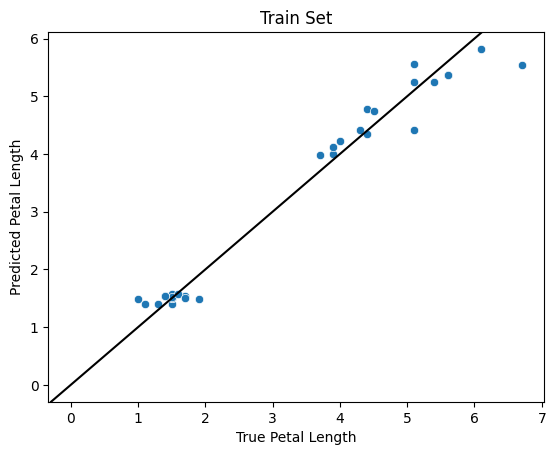

In [26]:
fig, ax = plt.subplots()
sns.scatterplot(
    x=y_train,
    y=y_train_hat,
)
plt.xlabel("True Petal Length")
plt.ylabel("Predicted Petal Length")
plt.title("Train Set")
# Add a 45-degree line to show what perfect predictions would be
ax.axline((0, 0), slope=1, color='#000')

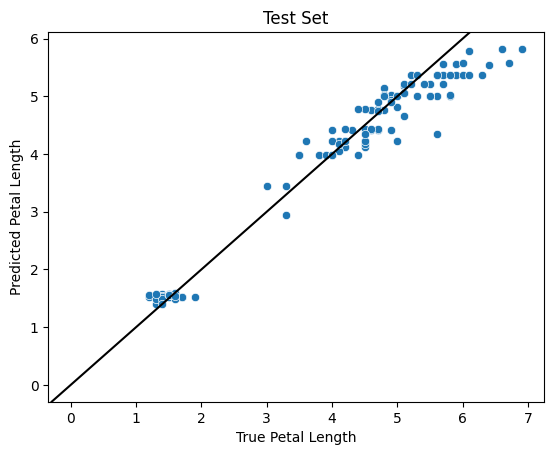

In [27]:
fig, ax = plt.subplots()
sns.scatterplot(
    x=y_test,
    y=y_test_hat,
)
plt.xlabel("True Petal Length")
plt.ylabel("Predicted Petal Length")
plt.title("Test Set")
# Add a 45-degree line to show what perfect predictions would be
ax.axline((0, 0), slope=1, color='#000')

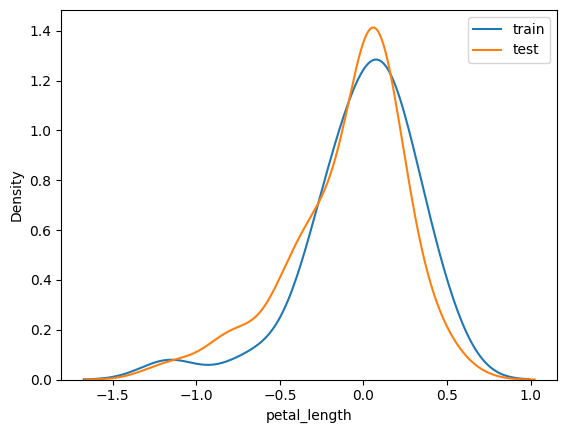

In [28]:
ax = sns.kdeplot(y_train_hat-y_train, label='train')
sns.kdeplot(y_test_hat-y_test, label='test')
ax.legend()

The purpose of this code is to compare the distribution of prediction errors (residuals) for both the training and test datasets. By visualizing the errors as KDE plots:

You can see whether the errors are mostly centered around zero (which would indicate good predictions).
You can also compare the distribution of errors between the training and test sets to see if there is overfitting (e.g., smaller errors on the train set but larger errors on the test set) or underfitting (errors are large for both sets).
This is a common technique for evaluating the performance of regression models and understanding how well the model generalizes to new data (the test set).